In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'

covid_19_nys_data = pd.read_csv(url)

In [4]:
covid_19_nys_data.head(10)

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/03/2020,Albany,26,293,123,4038
1,04/03/2020,Allegany,2,16,13,180
2,04/03/2020,Bronx,1229,12315,2108,23965
3,04/03/2020,Broome,9,65,55,538
4,04/03/2020,Cattaraugus,0,9,8,223
5,04/03/2020,Cayuga,1,7,15,322
6,04/03/2020,Chautauqua,1,10,20,159
7,04/03/2020,Chemung,1,36,28,461
8,04/03/2020,Chenango,7,39,40,168
9,04/03/2020,Clinton,1,31,11,243


In [5]:
table = covid_19_nys_data.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                ascending=[False, False]).drop_duplicates(subset ="County", 
                                keep = 'first').reset_index(drop=True).head(10)

table['New Positives'] = table['New Positives'].map('{:,}'.format)
table['Cumulative Number of Positives'] = table['Cumulative Number of Positives'].map('{:,}'.format)
table['Total Number of Tests Performed'] = table['Total Number of Tests Performed'].map('{:,}'.format)
table['Cumulative Number of Tests Performed'] = table['Cumulative Number of Tests Performed'].map('{:,}'.format)
table.drop(['Test Date'], axis=1, inplace=True)


print(table.to_markdown())

|    | County      | New Positives   | Cumulative Number of Positives   | Total Number of Tests Performed   | Cumulative Number of Tests Performed   |
|---:|:------------|:----------------|:---------------------------------|:----------------------------------|:---------------------------------------|
|  0 | Queens      | 1,947           | 20,114                           | 3,407                             | 35,407                                 |
|  1 | Kings       | 1,804           | 17,504                           | 3,234                             | 33,606                                 |
|  2 | Nassau      | 1,322           | 13,346                           | 2,694                             | 29,665                                 |
|  3 | Westchester | 730             | 13,081                           | 1,621                             | 42,334                                 |
|  4 | Bronx       | 1,229           | 12,315                           | 2,108               

In [6]:
covid_19_nys_data.shape

(2046, 6)

In [7]:
print('NYS COVID-19 data as of ' +  
      covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0] + '.')

NYS COVID-19 data as of 04/03/2020.


In [8]:
current_date = covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0]

In [9]:
print(current_date)

04/03/2020


In [10]:
current_date_path = current_date.replace('/', '-')

In [11]:
current_date_path

'04-03-2020'

In [12]:
data_path = 'data/New-York-State-Statewide-COVID-19-Testing-'+ current_date_path + '.csv'

In [13]:
print(data_path)

data/New-York-State-Statewide-COVID-19-Testing-04-03-2020.csv


In [14]:
covid_19_nys_data.to_csv(data_path, index=False)

In [15]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/03/2020,Albany,26,293,123,4038
1,04/03/2020,Allegany,2,16,13,180
2,04/03/2020,Bronx,1229,12315,2108,23965
3,04/03/2020,Broome,9,65,55,538
4,04/03/2020,Cattaraugus,0,9,8,223


In [16]:
covid_19_nys_data.tail()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
2041,03/02/2020,Washington,0,0,0,0
2042,03/02/2020,Wayne,0,0,0,0
2043,03/02/2020,Westchester,1,1,1,1
2044,03/02/2020,Wyoming,0,0,0,0
2045,03/02/2020,Yates,0,0,0,0


In [17]:
covid_19_nys_data.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [18]:
covid_19_nys_data.dtypes

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
dtype: object

In [19]:
covid_19_nys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             2046 non-null   object
 1   County                                2046 non-null   object
 2   New Positives                         2046 non-null   int64 
 3   Cumulative Number of Positives        2046 non-null   int64 
 4   Total Number of Tests Performed       2046 non-null   int64 
 5   Cumulative Number of Tests Performed  2046 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 96.0+ KB


In [20]:
covid_19_nys_data.describe()

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
count,2046.000000,2046.000000,2046.000000,2046.000000
mean,55.573803,415.363636,138.622190,1208.522972
std,212.810191,1820.242390,444.716359,4381.411501
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,6.000000,37.000000
75%,3.000000,18.000000,34.000000,252.250000
max,2022.000000,20114.000000,5951.000000,42334.000000


In [21]:
covid_19_nys_data.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
dtype: int64

In [22]:
covid_19_nys_data.isnull().sum().sum()

0

In [23]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/03/2020,Albany,26,293,123,4038
1,04/03/2020,Allegany,2,16,13,180
2,04/03/2020,Bronx,1229,12315,2108,23965
3,04/03/2020,Broome,9,65,55,538
4,04/03/2020,Cattaraugus,0,9,8,223


In [24]:
covid_19_nys_data['Test Date'] = pd.to_datetime(covid_19_nys_data['Test Date'], 
                                          infer_datetime_format=True)

In [25]:
covid_19_nys_data.dtypes

Test Date                               datetime64[ns]
County                                          object
New Positives                                    int64
Cumulative Number of Positives                   int64
Total Number of Tests Performed                  int64
Cumulative Number of Tests Performed             int64
dtype: object

In [26]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,2020-04-03,Albany,26,293,123,4038
1,2020-04-03,Allegany,2,16,13,180
2,2020-04-03,Bronx,1229,12315,2108,23965
3,2020-04-03,Broome,9,65,55,538
4,2020-04-03,Cattaraugus,0,9,8,223


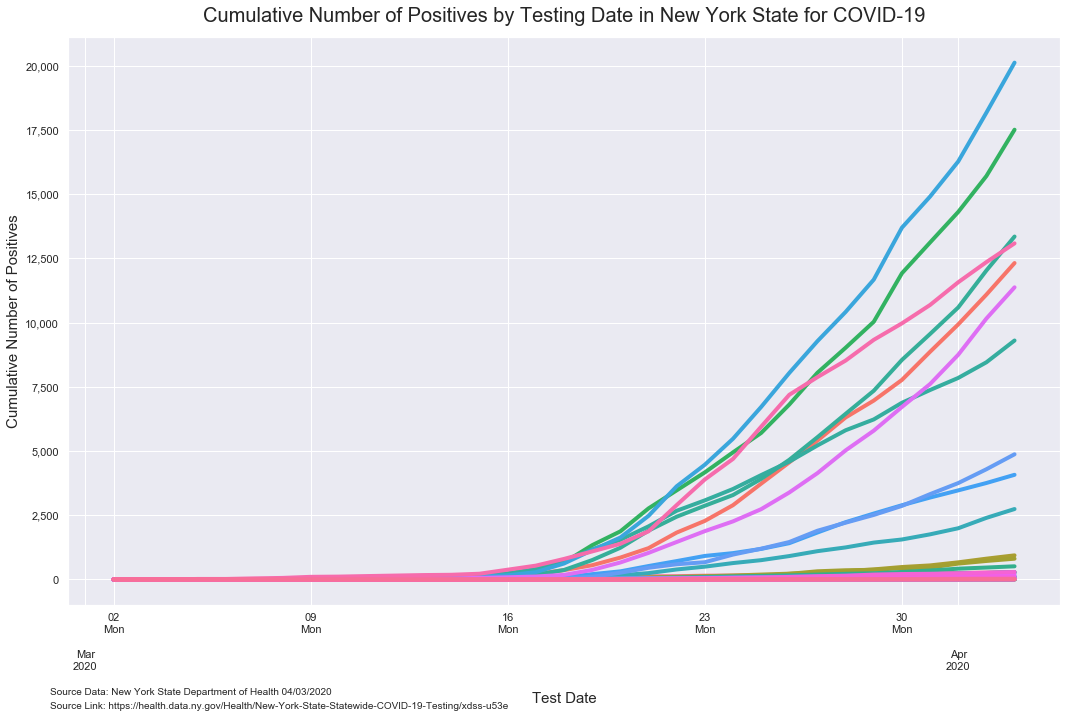

In [27]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county')

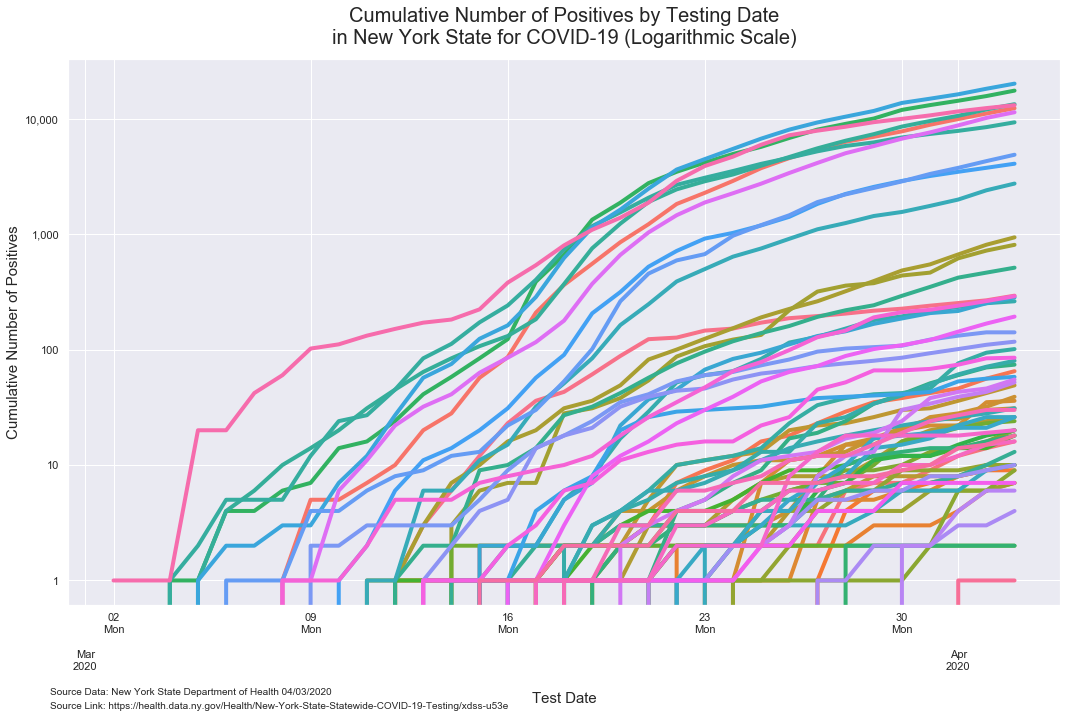

In [28]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-log')

In [29]:
drop_duplicates = covid_19_nys_data.sort_values(by="Cumulative Number of Positives", ascending=False).drop_duplicates(
                                                    subset ="County", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10['County'])
covid_19_nys_data_top_10  = covid_19_nys_data.loc[covid_19_nys_data['County'].isin(top10_list)]

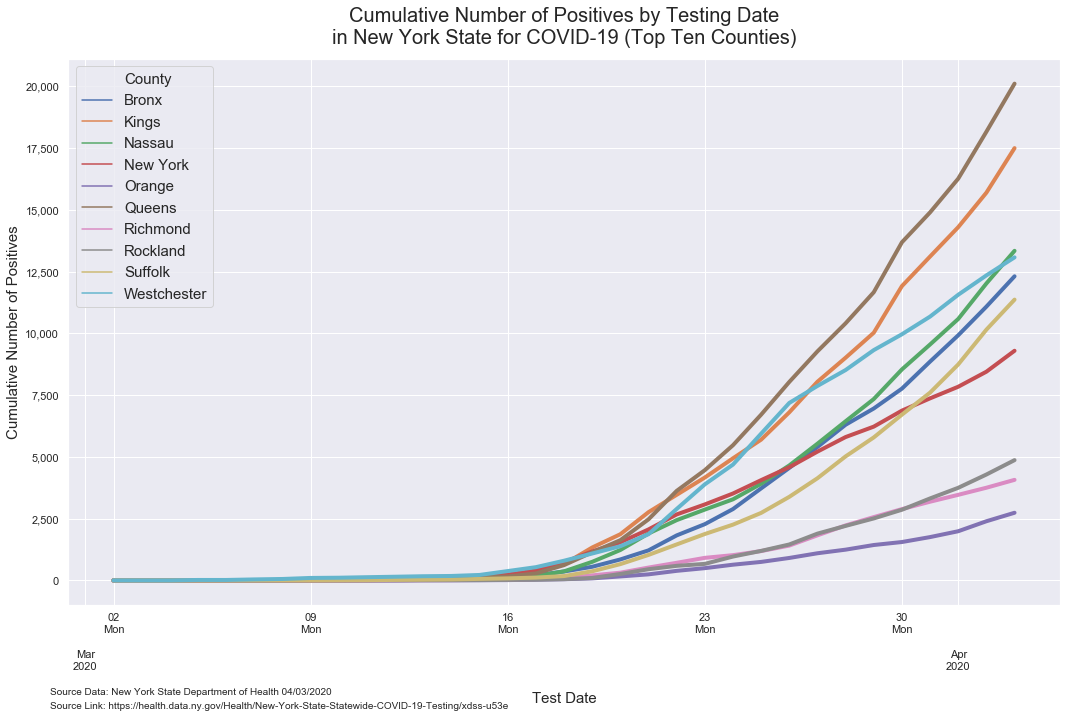

In [30]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data_top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10')

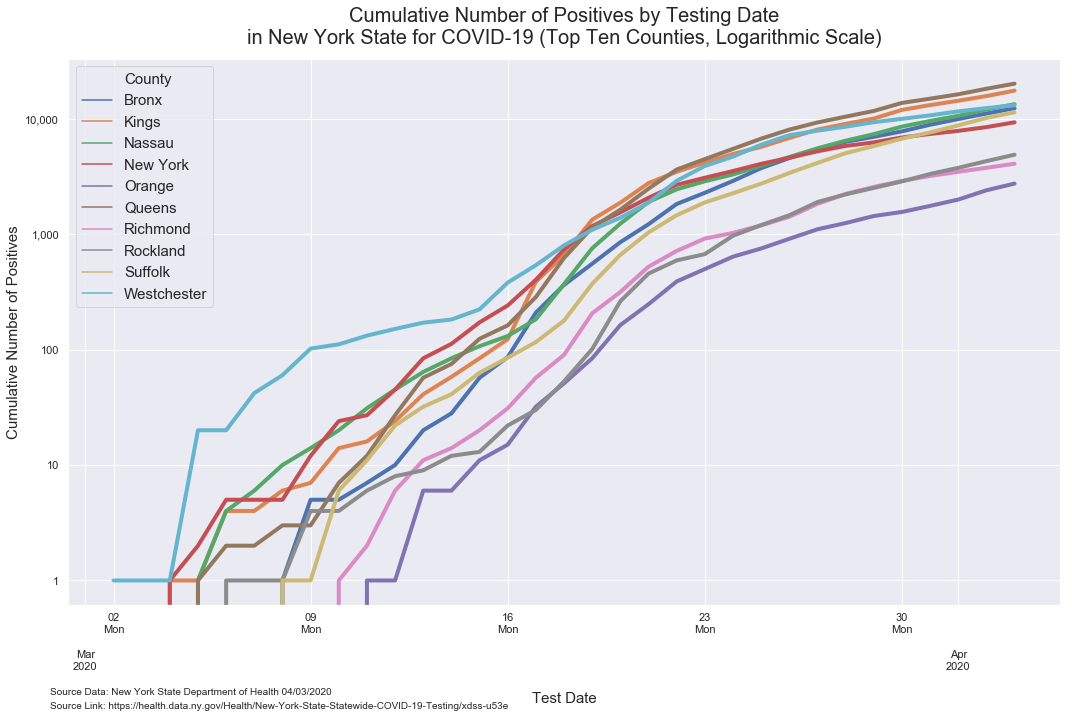

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10-log')

In [32]:
from_ten_cases = covid_19_nys_data.loc[covid_19_nys_data['Cumulative Number of Positives'] >= 10]

In [33]:
from_ten_cases = from_ten_cases.sort_values(by=['Test Date', 'Cumulative Number of Positives'], ascending=[True, True], ).drop_duplicates(subset ="County", keep = 'first').reset_index(drop=True)

In [34]:
from_ten_cases = from_ten_cases[['County', 'Test Date']]
from_ten_cases.rename(columns={'Test Date': 'ten_cases_date'}, inplace=True)

In [35]:
from_ten_cases

,County,ten_cases_date
0,Westchester,2020-03-05
1,Nassau,2020-03-08
2,New York,2020-03-09
3,Kings,2020-03-10
4,Suffolk,2020-03-11
5,Queens,2020-03-11
6,Bronx,2020-03-12
7,Richmond,2020-03-13
8,Rockland,2020-03-14
9,Dutchess,2020-03-15


In [36]:
from_ten_cases = covid_19_nys_data.merge(from_ten_cases, left_on='County', right_on='County')

In [37]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['Cumulative Number of Positives'] >= 10]

In [38]:
from_ten_cases

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date
0,2020-04-03,Albany,26,293,123,4038,2020-03-15
1,2020-04-02,Albany,14,267,105,3915,2020-03-15
2,2020-04-01,Albany,13,253,106,3810,2020-03-15
3,2020-03-31,Albany,14,240,108,3704,2020-03-15
4,2020-03-30,Albany,9,226,72,3596,2020-03-15
...,...,...,...,...,...,...,...
1679,2020-03-05,Westchester,19,20,42,44,2020-03-05
1683,2020-04-03,Wyoming,3,18,11,159,2020-03-31
1684,2020-04-02,Wyoming,1,15,11,148,2020-03-31
1685,2020-04-01,Wyoming,4,14,12,137,2020-03-31


In [39]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['Test Date'] - 
                                      from_ten_cases['ten_cases_date']).dt.days

In [40]:
from_ten_cases

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases
0,2020-04-03,Albany,26,293,123,4038,2020-03-15,19
1,2020-04-02,Albany,14,267,105,3915,2020-03-15,18
2,2020-04-01,Albany,13,253,106,3810,2020-03-15,17
3,2020-03-31,Albany,14,240,108,3704,2020-03-15,16
4,2020-03-30,Albany,9,226,72,3596,2020-03-15,15
...,...,...,...,...,...,...,...,...
1679,2020-03-05,Westchester,19,20,42,44,2020-03-05,0
1683,2020-04-03,Wyoming,3,18,11,159,2020-03-31,3
1684,2020-04-02,Wyoming,1,15,11,148,2020-03-31,2
1685,2020-04-01,Wyoming,4,14,12,137,2020-03-31,1


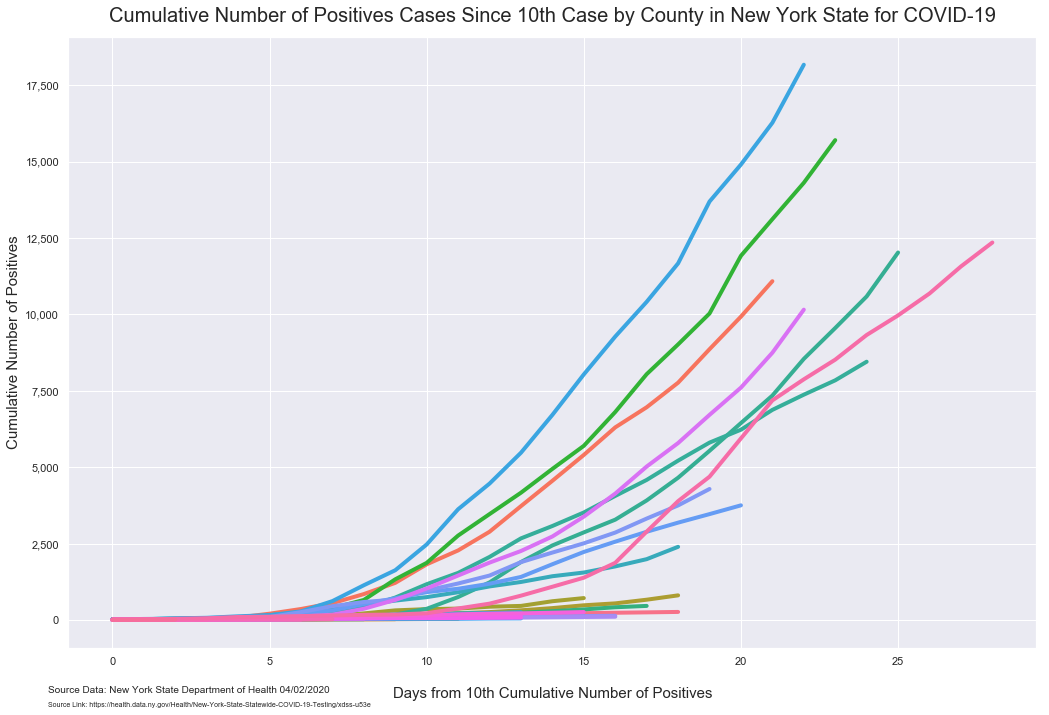

In [389]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives Cases Since 10th Case by County in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county')

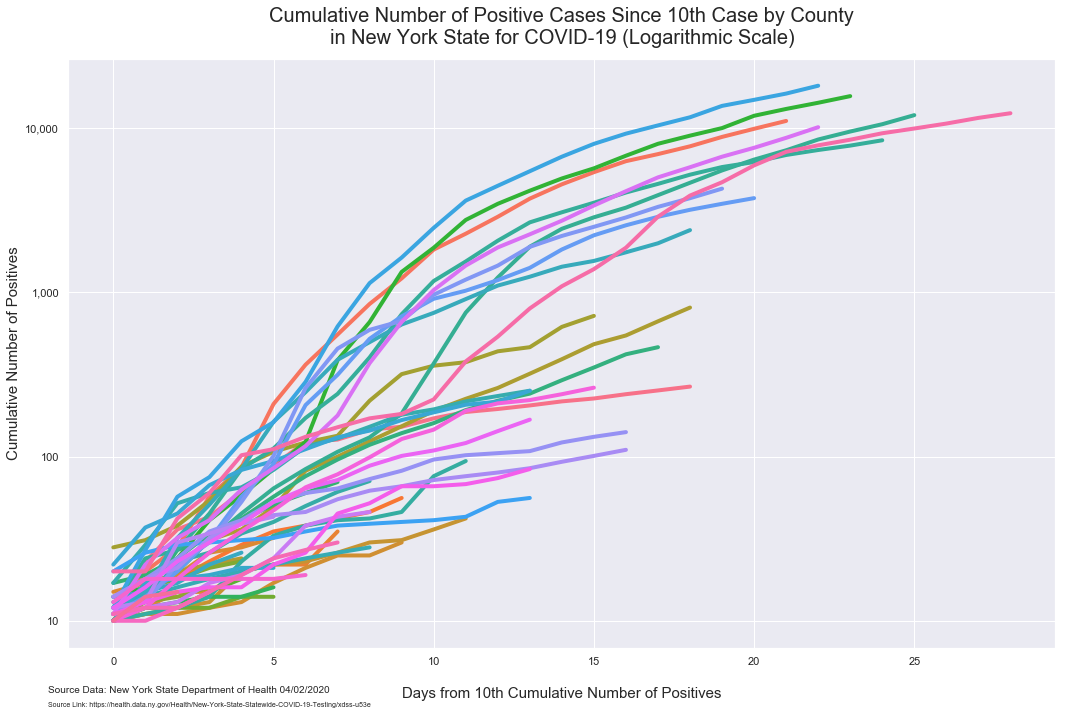

In [391]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positive Cases Since 10th Case by County\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-log')

In [45]:
top10_list = list(top_10['County'])

from_ten_cases_top_10  = from_ten_cases.loc[from_ten_cases['County'].isin(top10_list)]

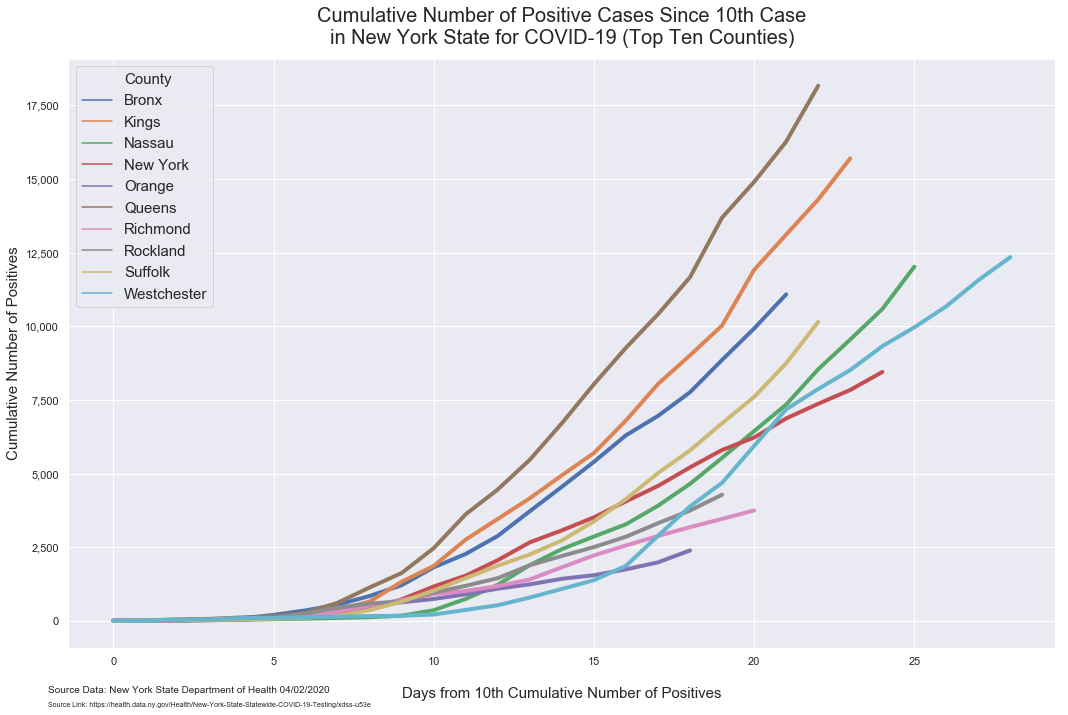

In [393]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positive Cases Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10')

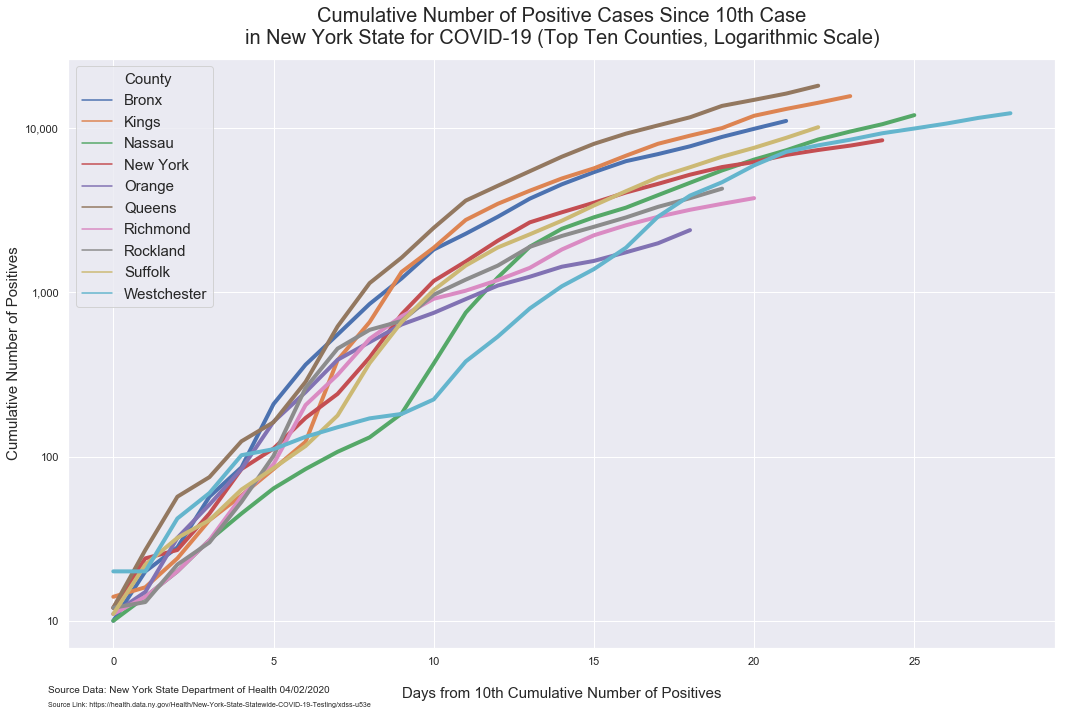

In [394]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positive Cases Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-log')

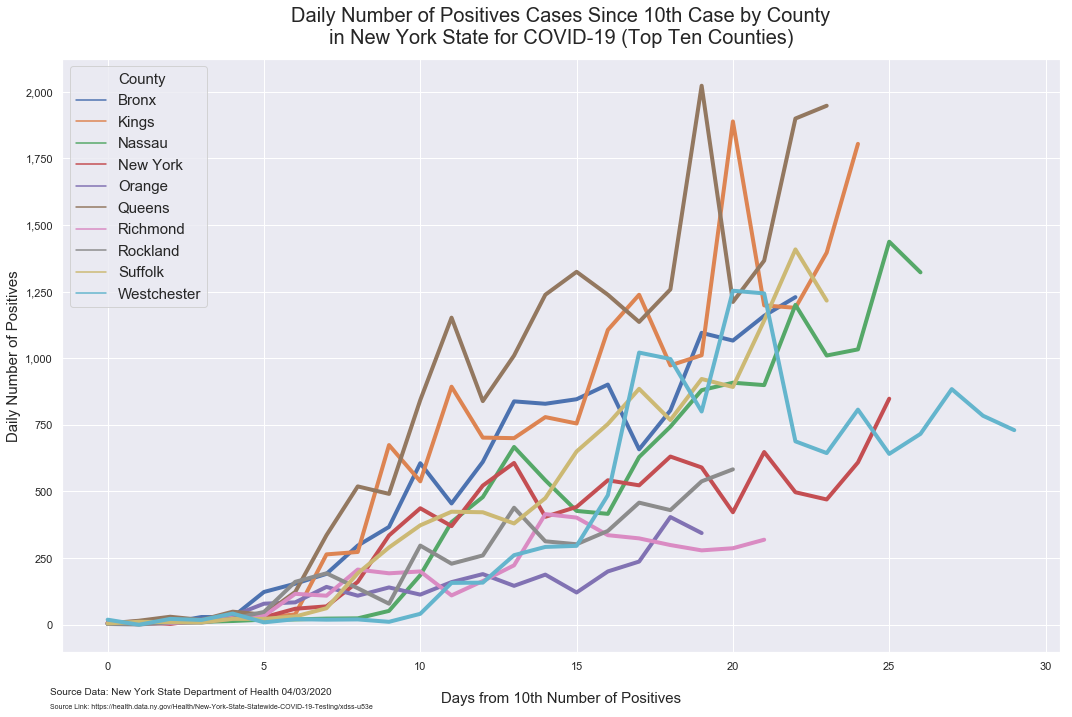

In [77]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positives Cases Since 10th Case by County\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

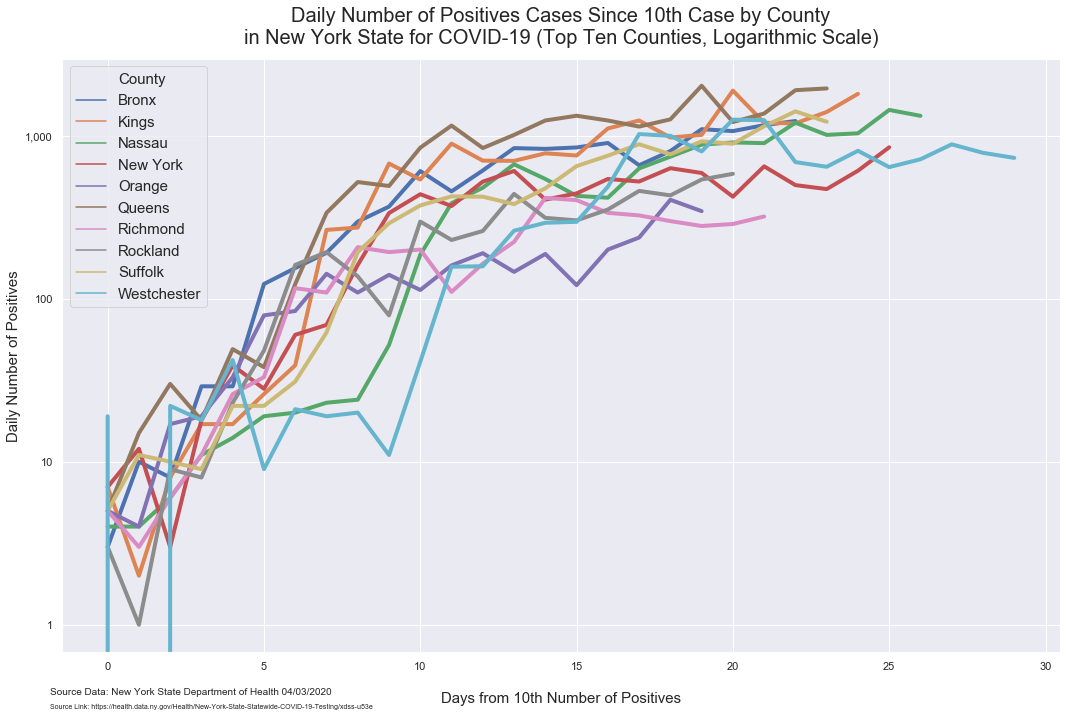

In [78]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positives Cases Since 10th Case by County\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily-log')

In [67]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [ ]:

trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                    'cases_diff': np.mean})
trajectory_plot = trajectory_plot.loc[trajectory_plot.cases_diff > 0]
trajectory_plot.reset_index(inplace=True)
trajectory_plot.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

In [68]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10_weekly.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'New Positives': np.mean})

In [69]:
from_ten_cases_top_10_weekly.reset_index(inplace=True)
from_ten_cases_top_10_weekly.rename(columns={'New Positives': 'New Positives Weekly Average'}, inplace=True)

In [70]:
from_ten_cases_top_10_weekly

,County,Test Date,days_from_10_cases,New Positives Weekly Average
0,Bronx,2020-03-15,3,12.500000
1,Bronx,2020-03-22,10,252.428571
2,Bronx,2020-03-29,17,734.000000
3,Bronx,2020-04-05,22,1070.600000
4,Kings,2020-03-15,5,12.833333
5,Kings,2020-03-22,12,483.285714
6,Kings,2020-03-29,19,937.428571
7,Kings,2020-04-05,24,1495.000000
8,Nassau,2020-03-08,0,4.000000
9,Nassau,2020-03-15,7,13.857143


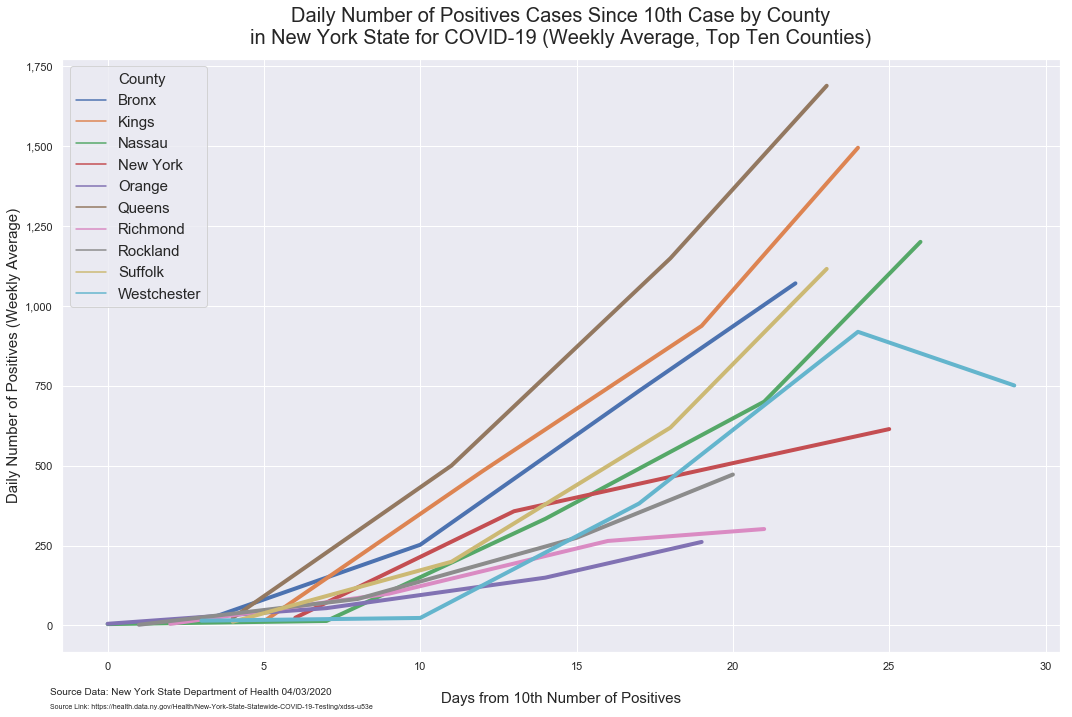

In [79]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positives Cases Since 10th Case by County\nin New York State for COVID-19 (Weekly Average, Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly')

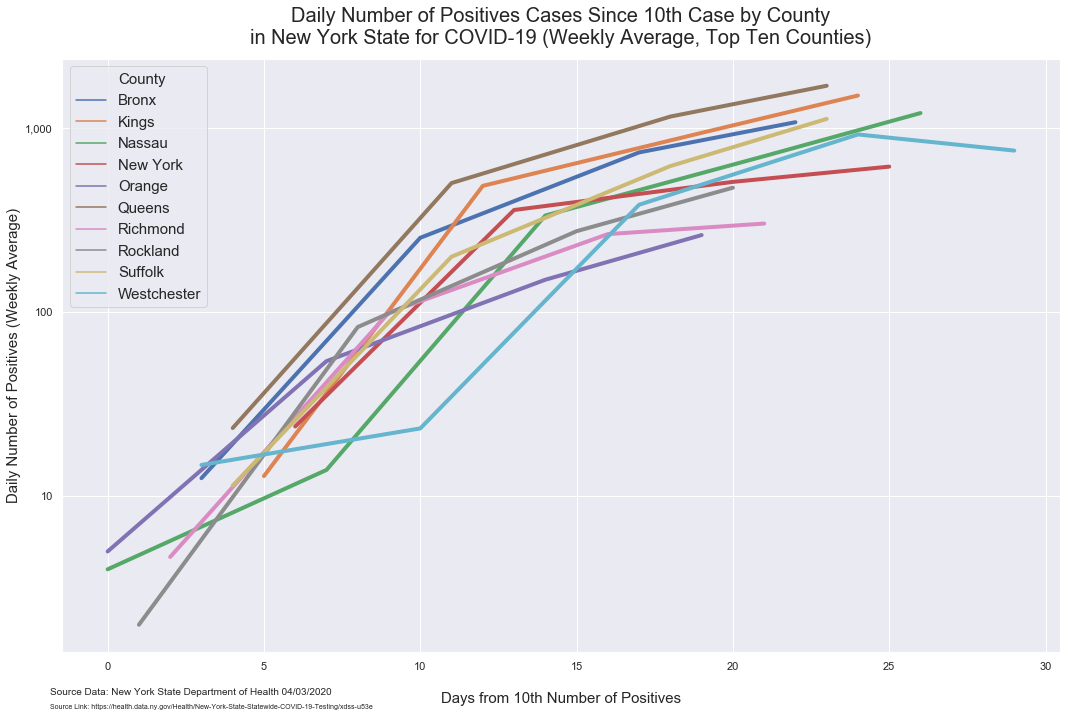

In [80]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positives Cases Since 10th Case by County\nin New York State for COVID-19 (Weekly Average, Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly-log')

In [323]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,2020-04-02,Albany,14,267,105,3915
1,2020-04-02,Allegany,2,14,18,167
2,2020-04-02,Bronx,1159,11086,1946,21857
3,2020-04-02,Broome,10,56,72,483
4,2020-04-02,Cattaraugus,1,9,24,215


In [324]:
nys_trajectory = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

nys_trajectory.set_index('Test Date', drop=False, inplace=True)

nys_trajectory.index = pd.to_datetime(nys_trajectory.index, infer_datetime_format=True)

In [325]:
nys_trajectory['cases_diff'] = nys_trajectory['Cumulative Number of Positives'].diff()
nys_trajectory = nys_trajectory.fillna(0)

In [326]:
nys_trajectory.head()

,Test Date,Cumulative Number of Positives,cases_diff
Test Date,,,
2020-03-02,2020-03-02,1,0.0
2020-03-03,2020-03-03,1,0.0
2020-03-04,2020-03-04,3,2.0
2020-03-05,2020-03-05,25,22.0
2020-03-06,2020-03-06,36,11.0


In [327]:
nys_trajectory = nys_trajectory.set_index('Test Date').resample('W').agg({'Cumulative Number of Positives': 
                                                                    np.max, 'cases_diff': np.mean})

In [328]:
nys_trajectory.reset_index(inplace=True)
nys_trajectory.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

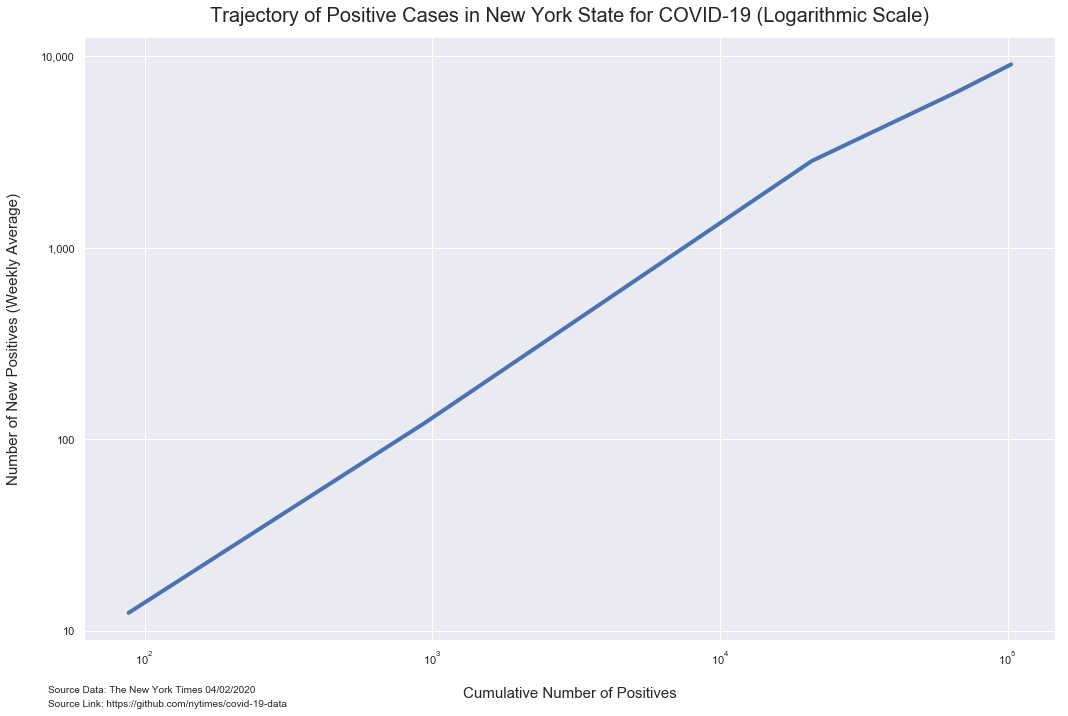

In [415]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg", data=nys_trajectory, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases in New York State for COVID-19 (Logarithmic Scale)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-log-log')

In [330]:
trajectory_plot = covid_19_nys_data.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [331]:
trajectory_plot.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
1922,2020-03-02,Albany,0,0,0,0
1860,2020-03-03,Albany,0,0,0,0
1798,2020-03-04,Albany,0,0,0,0
1736,2020-03-05,Albany,0,0,3,3
1674,2020-03-06,Albany,0,0,0,3


In [332]:
trajectory_plot['cases_diff'] = trajectory_plot['Cumulative Number of Positives'].diff()
trajectory_plot['cases_diff'].loc[trajectory_plot.cases_diff < 0] = 0
trajectory_plot = trajectory_plot.fillna(0)
trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                    'cases_diff': np.mean})
trajectory_plot = trajectory_plot.loc[trajectory_plot.cases_diff > 0]
trajectory_plot.reset_index(inplace=True)
trajectory_plot.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [333]:
trajectory_plot.head()

,County,Test Date,Cumulative Number of Positives,cases_diff_week_avg
0,Albany,2020-03-15,12,1.714286
1,Albany,2020-03-22,127,16.428571
2,Albany,2020-03-29,217,12.857143
3,Albany,2020-04-05,267,12.500000
4,Allegany,2020-03-15,2,0.285714


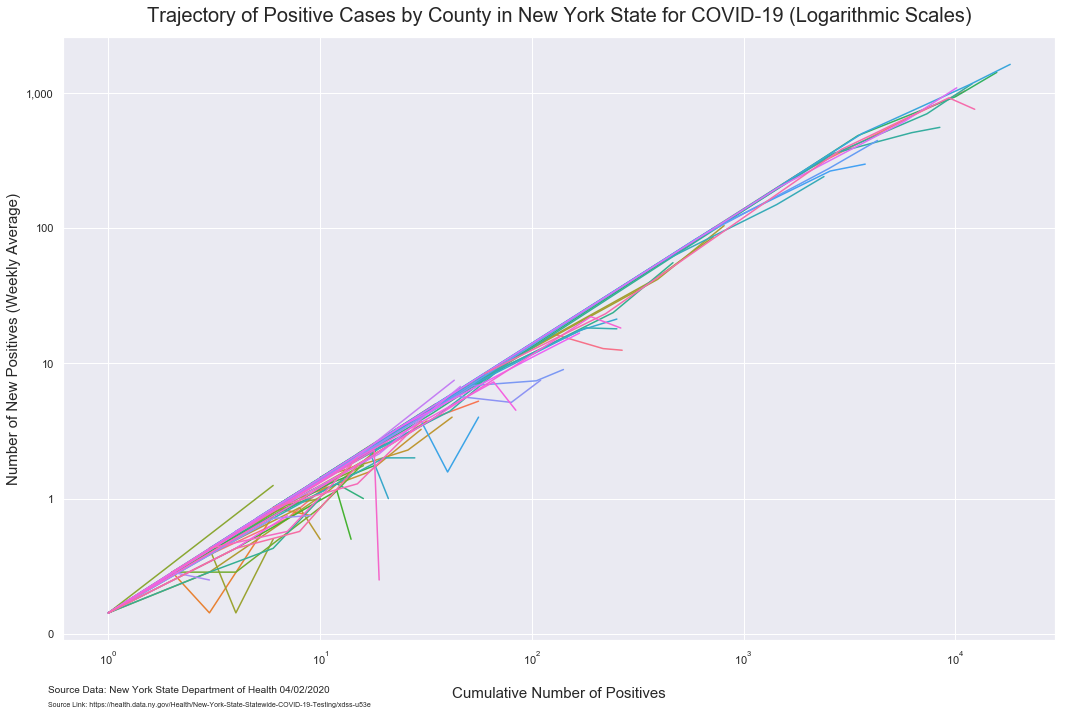

In [411]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg",
             hue="County",
             data=trajectory_plot)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by County in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log')

In [335]:
trajectory_plot_scatter = trajectory_plot.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                              ascending=[False, False]).drop_duplicates(subset ="County", 
                                              keep = 'first').reset_index(drop=True)

In [336]:
trajectory_plot_scatter.tail()

,County,Test Date,Cumulative Number of Positives,cases_diff_week_avg
57,Seneca,2020-04-05,6,1.500000
58,Schuyler,2020-04-05,3,0.250000
59,Yates,2020-04-05,1,0.250000
60,Lewis,2020-03-29,2,0.285714
61,Hamilton,2020-03-22,2,0.285714


In [337]:
print(list(trajectory_plot_scatter.County))

['Queens', 'Kings', 'Westchester', 'Nassau', 'Bronx', 'Suffolk', 'New York', 'Rockland', 'Richmond', 'Orange', 'Dutchess', 'Erie', 'Monroe', 'Albany', 'Ulster', 'Onondaga', 'Putnam', 'Sullivan', 'Saratoga', 'Schenectady', 'Niagara', 'Tompkins', 'Oneida', 'Madison', 'Broome', 'Rensselaer', 'Steuben', 'St. Lawrence', 'Columbia', 'Chemung', 'Chenango', 'Clinton', 'Wayne', 'Ontario', 'Oswego', 'Delaware', 'Greene', 'Otsego', 'Warren', 'Jefferson', 'Genesee', 'Livingston', 'Washington', 'Wyoming', 'Allegany', 'Herkimer', 'Cortland', 'Franklin', 'Montgomery', 'Cattaraugus', 'Chautauqua', 'Orleans', 'Schoharie', 'Tioga', 'Cayuga', 'Essex', 'Fulton', 'Seneca', 'Schuyler', 'Yates', 'Lewis', 'Hamilton']


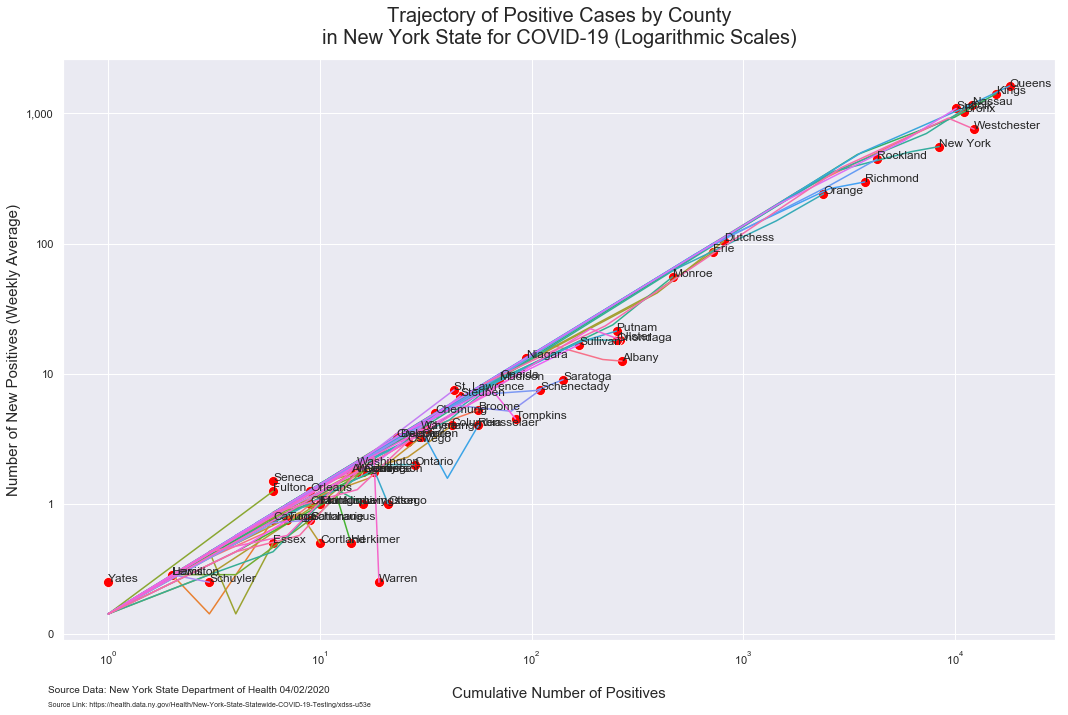

In [409]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="cases_diff_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.cases_diff_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by County\nin New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log-scatter')

In [339]:
top10_list = list(top_10['County'])

trajectory_plot_top_10  = trajectory_plot.loc[trajectory_plot['County'].isin(top10_list)]

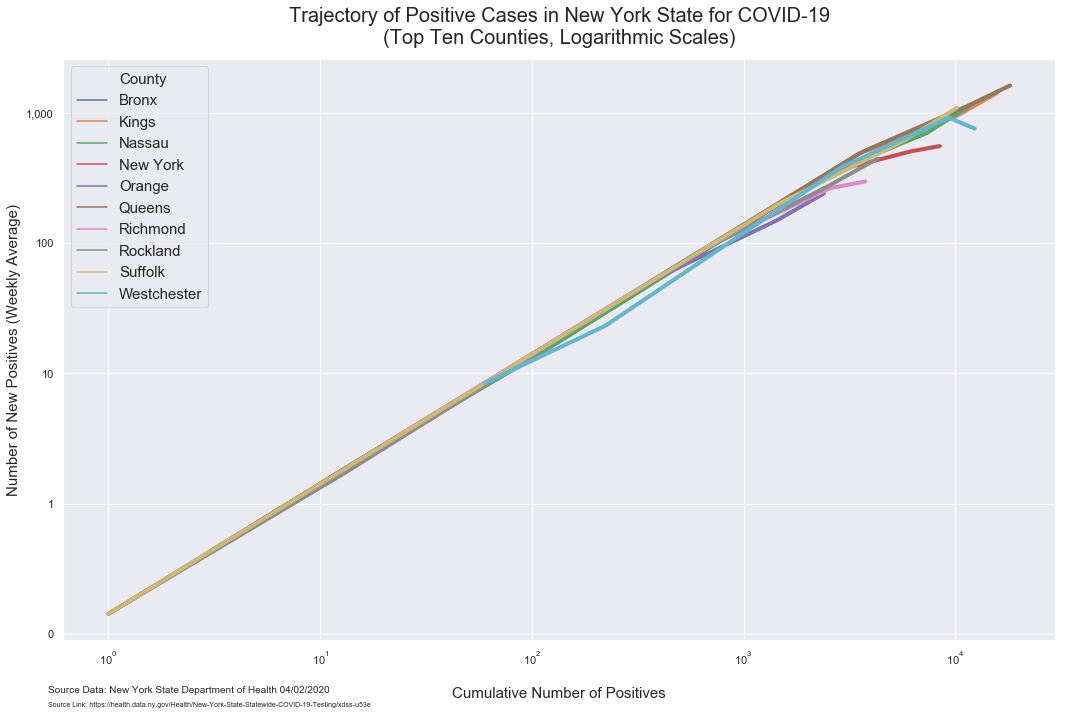

In [407]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="cases_diff_week_avg",
             hue="County",
             data=trajectory_plot_top_10, linewidth=4)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend(fontsize=15)
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases in New York State for COVID-19\n(Top Ten Counties, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-top-ten-log-log')

In [341]:
covid_19_nys_data_total = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

covid_19_nys_data_total.set_index('Test Date', drop=False, inplace=True)

covid_19_nys_data_total.index = pd.to_datetime(covid_19_nys_data_total.index, infer_datetime_format=True)

In [342]:
covid_19_nys_data_total.head(10)

,Test Date,Cumulative Number of Positives
Test Date,,
2020-03-02,2020-03-02,1
2020-03-03,2020-03-03,1
2020-03-04,2020-03-04,3
2020-03-05,2020-03-05,25
2020-03-06,2020-03-06,36
2020-03-07,2020-03-07,60
2020-03-08,2020-03-08,88
2020-03-09,2020-03-09,151
2020-03-10,2020-03-10,195


In [343]:
covid_19_nys_data_total.tail(10)

,Test Date,Cumulative Number of Positives
Test Date,,
2020-03-24,2020-03-24,30810
2020-03-25,2020-03-25,37258
2020-03-26,2020-03-26,44637
2020-03-27,2020-03-27,52318
2020-03-28,2020-03-28,59513
2020-03-29,2020-03-29,66497
2020-03-30,2020-03-30,75795
2020-03-31,2020-03-31,83712
2020-04-01,2020-04-01,92381


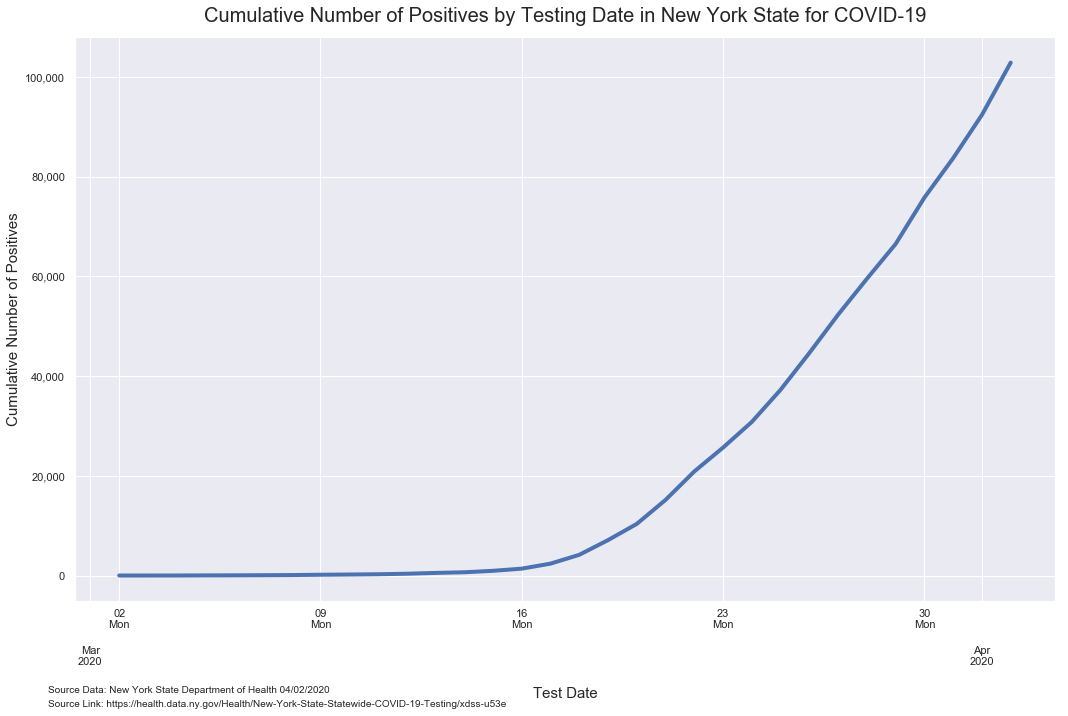

In [361]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys')

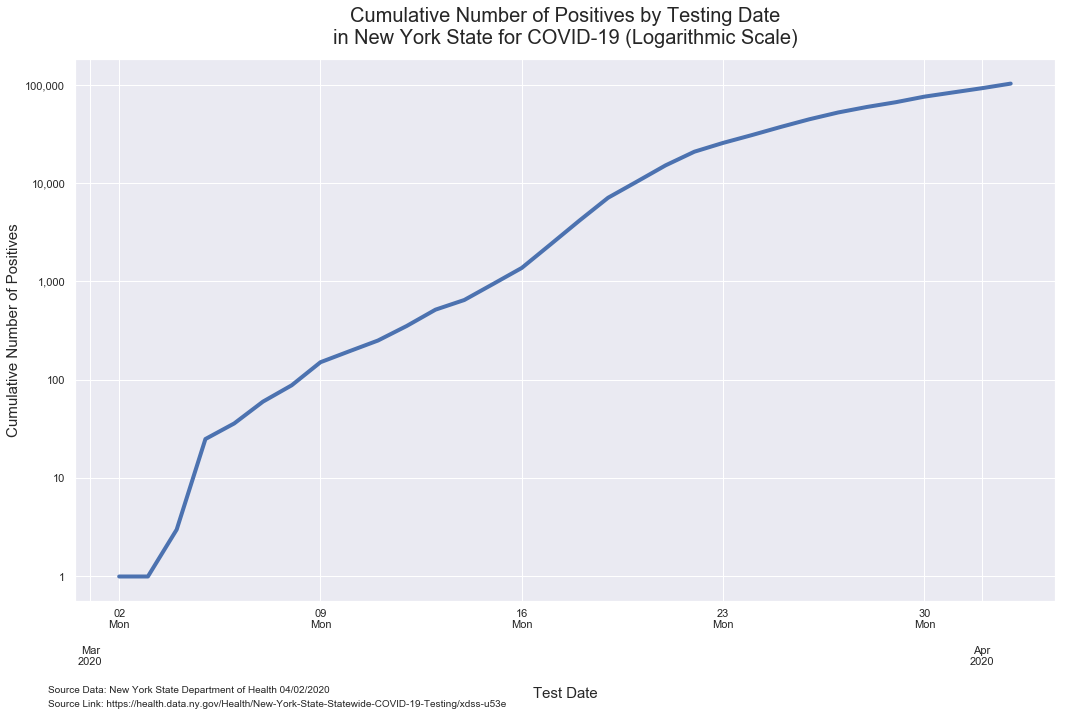

In [406]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Positives by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys-log')

In [346]:
bar_plot = covid_19_nys_data.sort_values(by = 'Test Date', 
                    ascending=False).drop_duplicates(
                    subset ="County", keep = 'first')

In [347]:
bar_plot = bar_plot.sort_values(by = 'Cumulative Number of Positives', ascending=True)

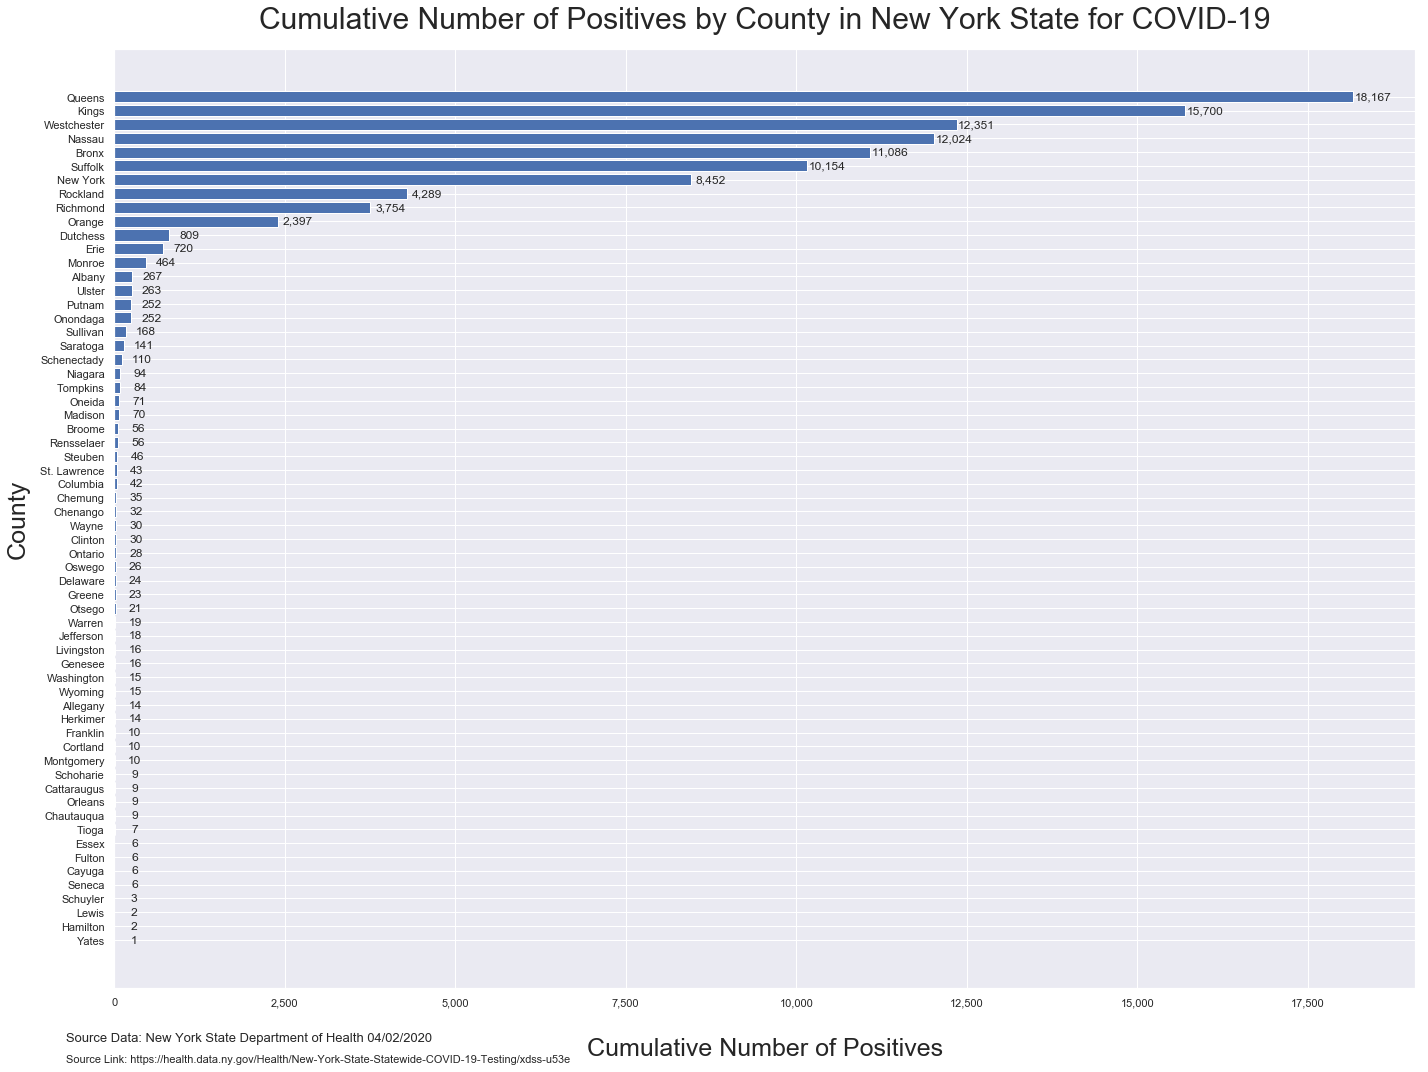

In [363]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.County, bar_plot['Cumulative Number of Positives'])
plt.xlabel("Cumulative Number of Positives", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("County", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=11)

plt.title("Cumulative Number of Positives by County in New York State for COVID-19", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/cases-by-county-barh')